In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

#Menyimpan Numpy Array dari source code sebelumnya

In [2]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Pertama menggunakan activasi relu dan maxpooling layer

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Kedua menggunakan conv2d, activation relu, dan maxpooling2d

model.add(Flatten())
model.add(Dropout(0.5))
#Layer Flatten
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#Final layer menggunakan 2 output kategori

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
26/26 [==============================] - 33s 1s/step - loss: 0.3862 - accuracy: 0.8645 - val_loss: 0.3143 - val_accuracy: 0.8775
Epoch 2/20
26/26 [==============================] - 31s 1s/step - loss: 0.2795 - accuracy: 0.8892 - val_loss: 0.3427 - val_accuracy: 0.8775
Epoch 3/20
26/26 [==============================] - 32s 1s/step - loss: 0.2308 - accuracy: 0.8892 - val_loss: 0.1921 - val_accuracy: 0.8775
Epoch 4/20
26/26 [==============================] - 39s 2s/step - loss: 0.1783 - accuracy: 0.8892 - val_loss: 0.1790 - val_accuracy: 0.8775
Epoch 5/20
26/26 [==============================] - 40s 2s/step - loss: 0.1474 - accuracy: 0.9273 - val_loss: 0.1563 - val_accuracy: 0.9363
Epoch 6/20
26/26 [==============================] - 31s 1s/step - loss: 0.1310 - accuracy: 0.9470 - val_loss: 0.1514 - val_accuracy: 0.9216
Epoch 7/20
26/26 [==============================] - 30s 1s/step - loss: 0.1219 - accuracy: 0.9544 - val_loss: 0.1671 - val_accuracy: 0.9118
Epoch 8/20
26/26 [==

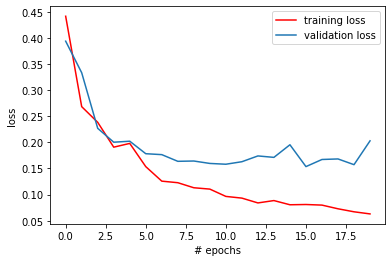

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

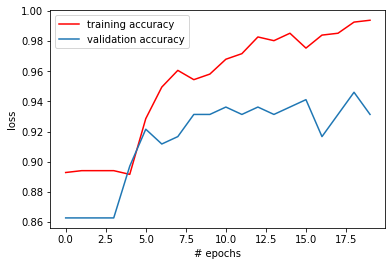

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

4/4 [==============================] - 1s 210ms/step - loss: 0.2917 - accuracy: 0.9027
[0.29173123836517334, 0.9026548862457275]
